In [19]:
import sys
sys.path.append("../code/")

In [20]:
import util_ElasticNet, lib_LinearAlgebra, util_hdf5
import tensorflow as tf
import numpy as np
import h5py, yaml
import matplotlib.pyplot as plt

In [21]:
from importlib import reload  
import lib_LinearAlgebra
lib_LinearAlgebra = reload(lib_LinearAlgebra)

In [22]:
feature_dic = util_hdf5.read_yaml('/vol/bmd/yanyul/GitHub/ptrs-ukb/misc/gwas_full_pheno_covar.yaml')

In [23]:
hdf5_test = '/vol/bmd/yanyul/UKB/predicted_expression_tf2/ukb_imp_x_ctimp_Whole_Blood_Chinese.hdf5'

In [24]:
with h5py.File(hdf5_test, 'r') as f:
    features = f['columns_y'][:].astype('str')

In [25]:
covar_indice = np.where(np.isin(features, feature_dic['covar_names'].split(',')))[0]
trait_indice = np.where(np.isin(features, feature_dic['pheno_names'].split(',')))[0]

In [39]:
dataset, n = util_ElasticNet.load_hdf5_as_dataset(
    [hdf5_test, hdf5_test],
    ['/X', '/y'],
    batch_size = 128,
    num_epochs = 1
)

In [40]:
data_scheme = lib_LinearAlgebra.DataScheme(
    dataset = dataset, 
    X_index = 0,
    Y_index = 1,
    outcome_indice = list(trait_indice), 
    covariate_indice = list(covar_indice)
)

In [51]:
least_square_solver = lib_LinearAlgebra.LeastSquaredEstimator(data_scheme, intercept = True, normalizer = True, )

In [52]:
least_square_solver.normalizer

False

In [53]:
least_square_solver.solve()

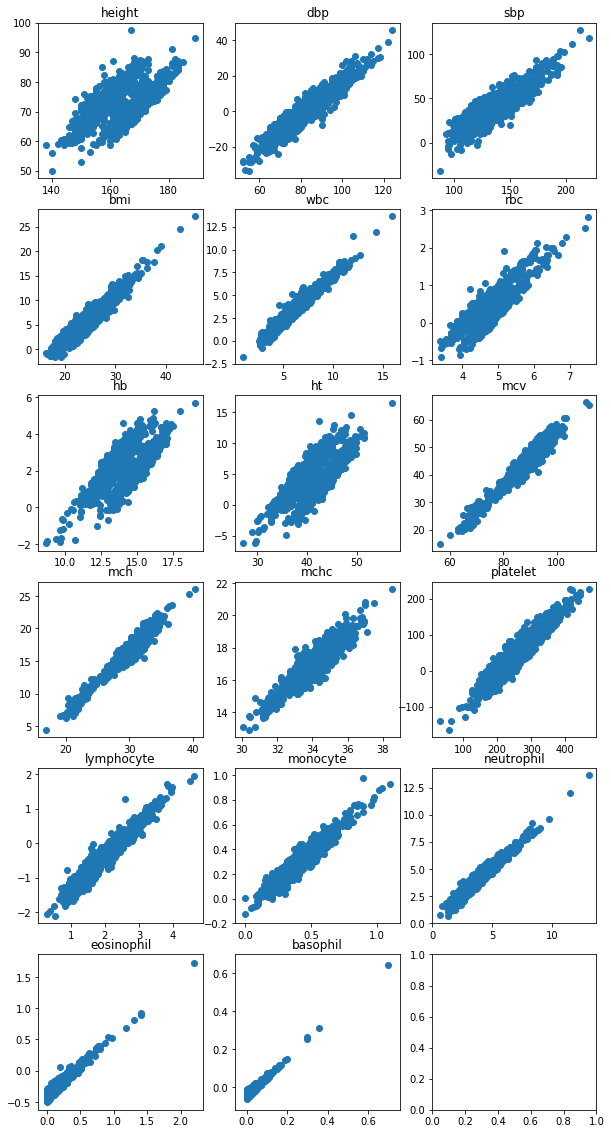

In [54]:
y_pred = least_square_solver.predict_x(dataset)
fig, axe = plt.subplots(ncols = 3, nrows = 6, figsize = (10,20))
for i in range(3):
    for j in range(6):
        k = j * 3 + i 
        if k < 17:
            axe[j][i].scatter(y_pred['y'][:, k], y_pred['y_pred_from_x'][:, k])
            axe[j][i].title.set_text(features[trait_indice][k])

In [31]:
loaded_solver = lib_LinearAlgebra.LeastSquaredEstimator('')
loaded_solver.minimal_load('/vol/bmd/yanyul/UKB/ptrs-tf/models/least_square_model-ukb_imp_x_ctimp_Whole_Blood_Chinese.hdf5')

In [32]:
# FIXME: all about batch normalization pain
# with h5py.File('/vol/bmd/yanyul/UKB/ptrs-tf/models/least_square_model-ukb_imp_x_ctimp_Whole_Blood_Chinese-normalizer.hdf5', 'r') as f:
#     mean = f['mean'][:]
#     std = f['std'][:]

# def mydiv(a, b):
#     return np.divide(a, b, out=np.zeros(a.shape, dtype=float), where=b!=0)
# mean = np.array(mean)
# std = np.array(std)
# least_square_solver_batch = loaded_solver
# beta_old = mydiv(least_square_solver_batch.betahat[:,0][1:], std)
# intercept_old = least_square_solver_batch.betahat[:,0][0] - sum(mydiv(mean, std) * least_square_solver_batch.betahat[:,0][1:])

# # least_square_solver_batch.betahat[:,0][0]

# tmp = mydiv(mean, std) * least_square_solver_batch.betahat[:,0][1:]
# print(sum(tmp[:3]))

# print(intercept_old - least_square_solver.betahat[:,0][0])

# print(mydiv(least_square_solver_batch.betahat[:,0][1:], std) - least_square_solver.betahat[:,0][1:])

# print(least_square_solver_batch.betahat.shape)
# print(loaded_solver.data_scheme.outcome_indice)

# y_pred = least_square_solver.predict_x(dataset.take(4000))
# y_pred2 = loaded_solver.predict_x(dataset.take(4000))
# fig, axe = plt.subplots(ncols = 3, nrows = 6, figsize = (10,20))
# for i in range(3):
#     for j in range(6):
#         k = j * 3 + i 
#         if k < 17:
#             axe[j][i].scatter(y_pred['y_pred_from_x'][:, k], y_pred2['y_pred_from_x'][:, k])
#             axe[j][i].title.set_text(features[trait_indice][k])

# y_pred = least_square_solver.predict(dataset.take(4000))
# y_pred2 = loaded_solver.predict(dataset.take(4000))
# fig, axe = plt.subplots(ncols = 3, nrows = 6, figsize = (10,20))
# for i in range(3):
#     for j in range(6):
#         k = j * 3 + i 
#         if k < 17:
#             axe[j][i].scatter(y_pred['y_pred'][:, k], y_pred2['y_pred'][:, k])
#             axe[j][i].title.set_text(features[trait_indice][k])

# loaded_solver.batch_normalization_shuffle

In [33]:
# with h5py.File('/vol/bmd/yanyul/UKB/ptrs-tf/models/least_square_model-ukb_imp_x_ctimp_Whole_Blood_Chinese.hdf5', 'r') as f:
#     xtx = f['xtx'][...]

In [34]:
# print(xtx[7069, 7069])
# print(least_square_solver.xtx[7069, 7069])

In [35]:
# with h5py.File('/vol/bmd/yanyul/UKB/predicted_expression_tf2/ukb_imp_x_ctimp_Whole_Blood_Chinese.hdf5', 'r') as f:
#     g = f['X'][:, 7069]

In [36]:
# dataset.shuffle(100)